<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [11]:
!wget 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.

In [13]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [17]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [19]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [21]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [23]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


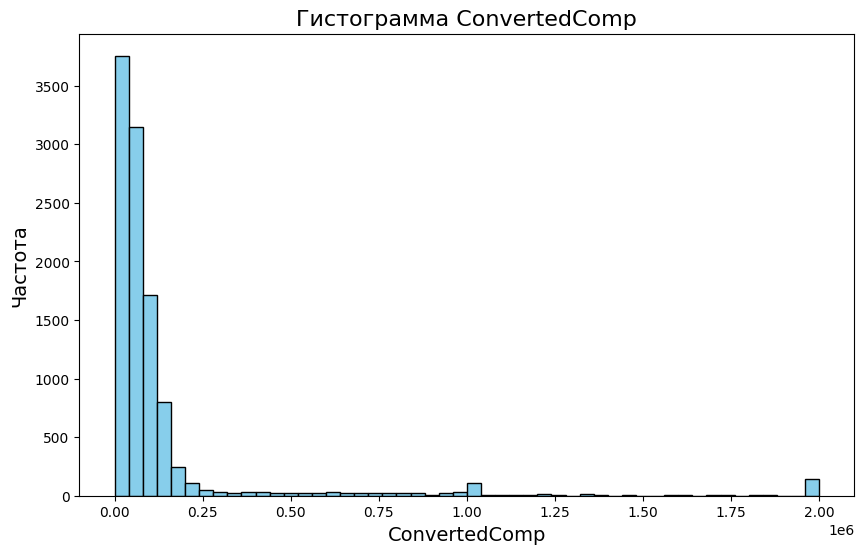

In [28]:
# your code goes here

conn = sqlite3.connect('m4_survey_data.sqlite')
df = pd.read_sql("SELECT * FROM master", conn)  
conn.close()

if 'ConvertedComp' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['ConvertedComp'].dropna(), bins=50, color='skyblue', edgecolor='black')
    plt.title('Гистограмма ConvertedComp', fontsize=16)
    plt.xlabel('ConvertedComp', fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.show()
else:
    print("Столбец 'ConvertedComp' не найден в таблице.")

### Box Plots


Plot a box plot of `Age.`


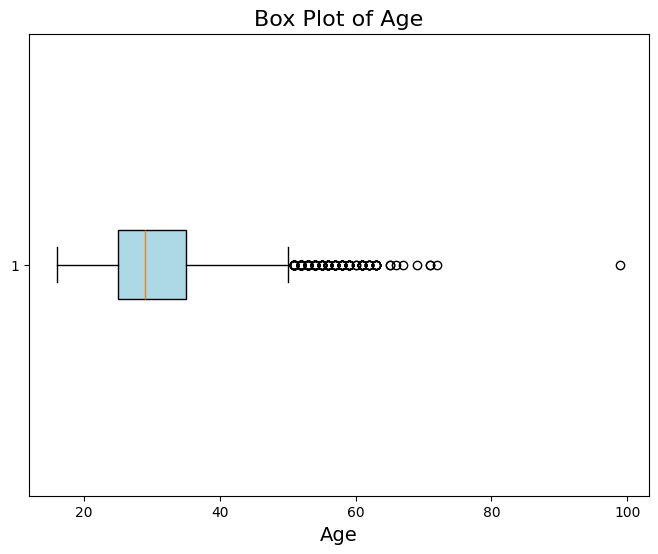

In [31]:
# your code goes here

conn = sqlite3.connect('m4_survey_data.sqlite')
df = pd.read_sql("SELECT * FROM master", conn)  
conn.close()

if 'Age' in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df['Age'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title('Box Plot of Age', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.show()
else:
    print("Столбец 'Age' не найден в таблице.")

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


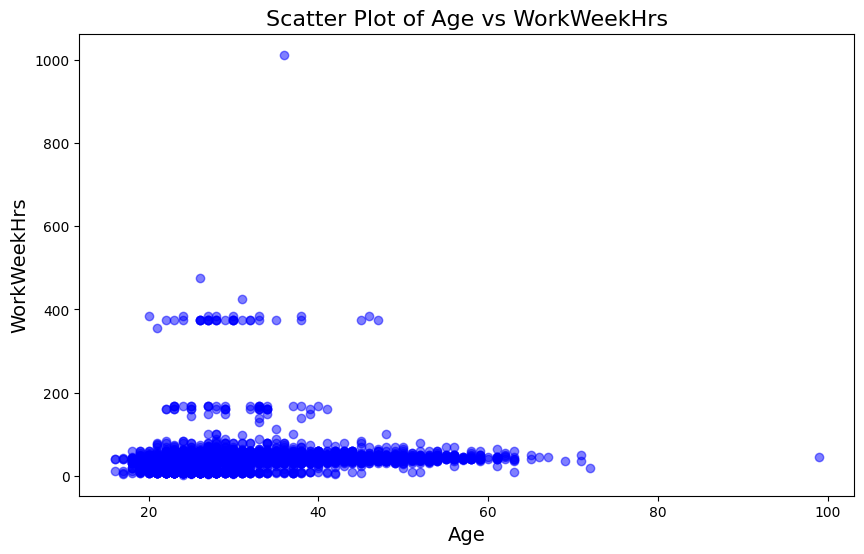

In [35]:
# your code goes here

conn = sqlite3.connect('m4_survey_data.sqlite')
df = pd.read_sql("SELECT * FROM master", conn)  # Замените survey_data_table_name на фактическое имя таблицы
conn.close()

# Проверка наличия столбцов Age и WorkWeekHrs
if 'Age' in df.columns and 'WorkWeekHrs' in df.columns:
    # Построение scatter plot для столбцов Age и WorkWeekHrs
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Age'], df['WorkWeekHrs'], color='blue', alpha=0.5)

    # Добавление заголовков и меток
    plt.title('Scatter Plot of Age vs WorkWeekHrs', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('WorkWeekHrs', fontsize=14)

    # Отображение графика
    plt.show()
else:
    print("Один из столбцов ('Age' или 'WorkWeekHrs') не найден в таблице.")

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


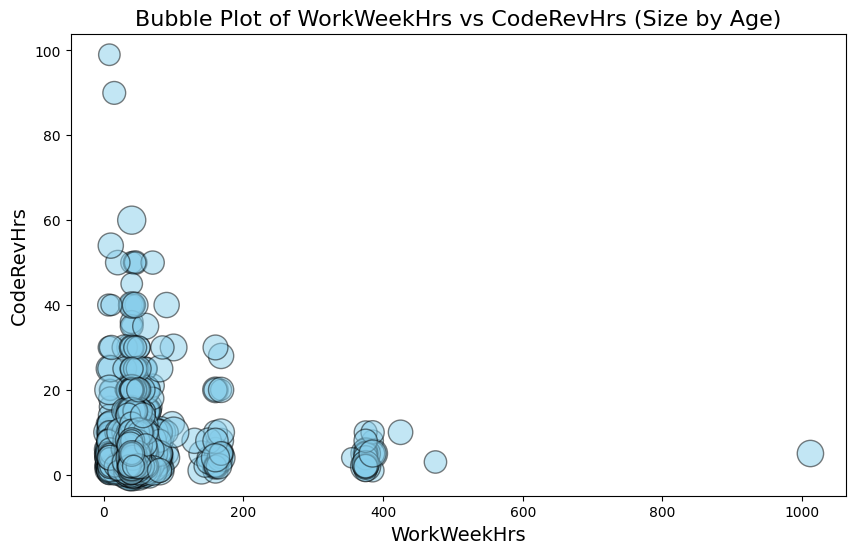

In [38]:
# your code goes here

conn = sqlite3.connect('m4_survey_data.sqlite')
df = pd.read_sql("SELECT * FROM master", conn)

conn.close()

df['WorkWeekHrs'] = pd.to_numeric(df['WorkWeekHrs'], errors='coerce')
df['CodeRevHrs'] = pd.to_numeric(df['CodeRevHrs'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'], inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=df['Age']*10, color='skyblue', alpha=0.5, edgecolors='black')
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs (Size by Age)', fontsize=16)
plt.xlabel('WorkWeekHrs', fontsize=14)
plt.ylabel('CodeRevHrs', fontsize=14)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


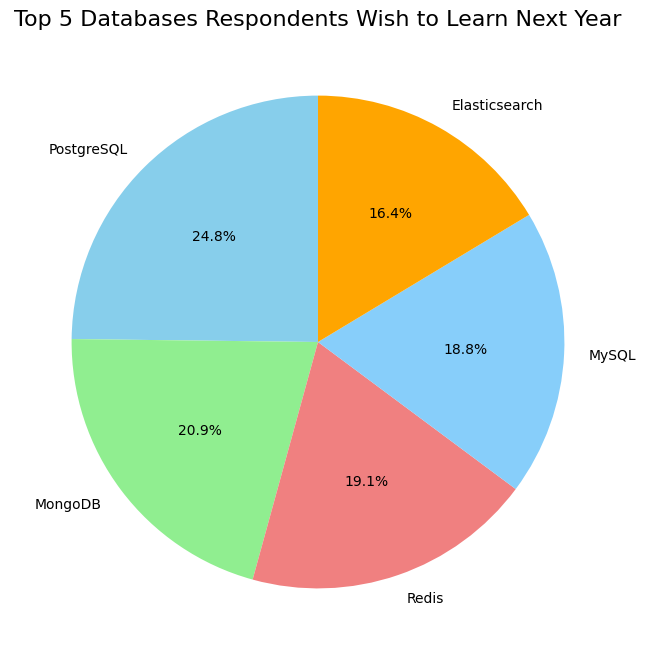

In [53]:
# your code goes here

conn = sqlite3.connect('m4_survey_data.sqlite')

df = pd.read_sql("SELECT * FROM DatabaseDesireNextYear", conn)

conn.close()

database_column = 'DatabaseDesireNextYear'  

top_databases = df[database_column].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'orange'])
plt.title('Top 5 Databases Respondents Wish to Learn Next Year', fontsize=16)
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


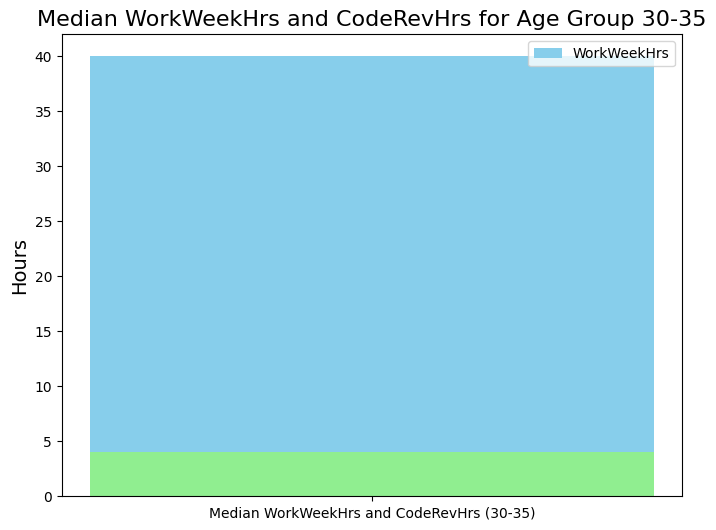

In [43]:
# your code goes here

conn = sqlite3.connect('m4_survey_data.sqlite')

df = pd.read_sql("SELECT * FROM master", conn)

conn.close()

age_group_df = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

median_workweekhrs = age_group_df['WorkWeekHrs'].median()
median_coderevhrs = age_group_df['CodeRevHrs'].median()
medians = [median_workweekhrs, median_coderevhrs]

plt.figure(figsize=(8, 6))
plt.bar(['Median WorkWeekHrs and CodeRevHrs (30-35)'], medians, color=['skyblue', 'lightgreen'])
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.legend(['WorkWeekHrs', 'CodeRevHrs'], loc='upper right')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


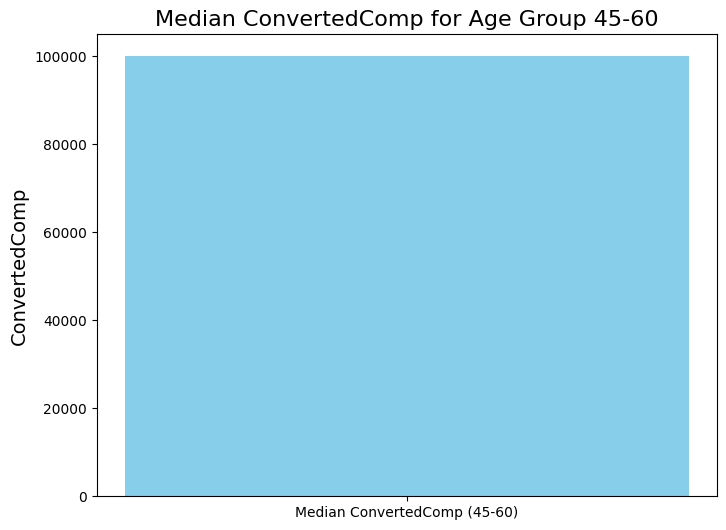

In [45]:
# your code goes here

conn = sqlite3.connect('m4_survey_data.sqlite')
df = pd.read_sql("SELECT * FROM master", conn)
conn.close()

age_group_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]
median_convertedcomp = age_group_df['ConvertedComp'].median()

plt.figure(figsize=(8, 6))
plt.bar(['Median ConvertedComp (45-60)'], [median_convertedcomp], color='skyblue')
plt.title('Median ConvertedComp for Age Group 45-60', fontsize=16)
plt.ylabel('ConvertedComp', fontsize=14)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


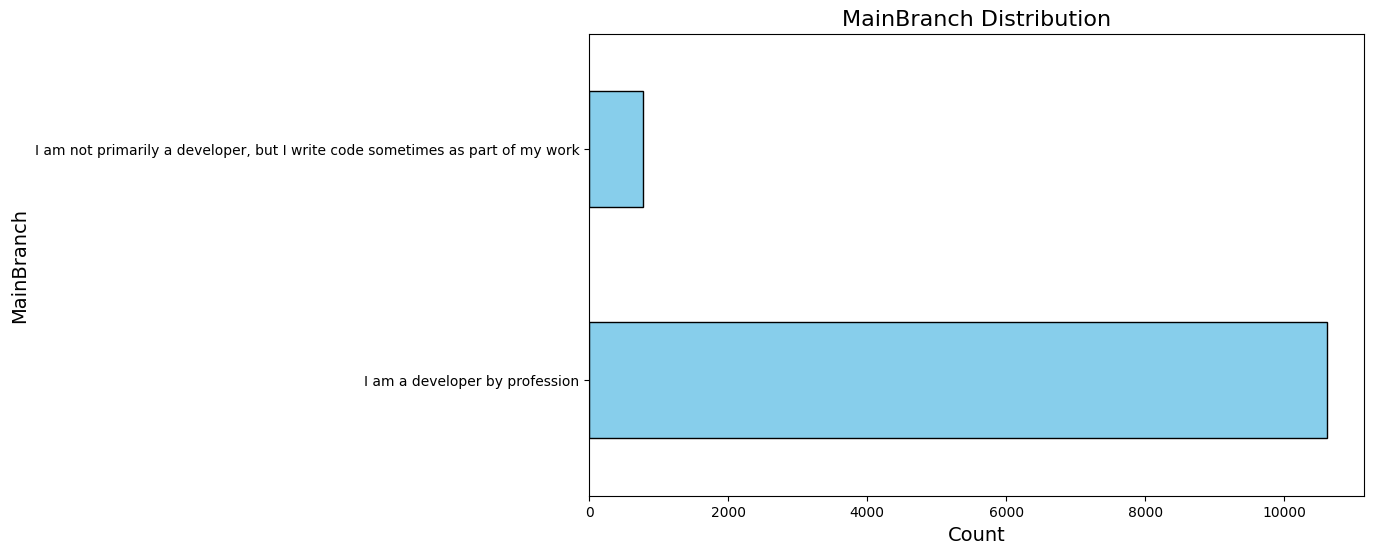

In [47]:
# your code goes here

conn = sqlite3.connect('m4_survey_data.sqlite')

df = pd.read_sql("SELECT * FROM master", conn)

conn.close()

mainbranch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('MainBranch Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('MainBranch', fontsize=14)
plt.show()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
